
### WEEK 5: FRIDAY LAB 04

Determine which of the variables in your team dataset depend on other variables; that is, which independent variables can be used to predict values for the dependent variable most effectively.

1. Select one dependent variable in the dataset. This will be your target variable for the remainder of this lab. Explain how and why you have selected that particular target variable in no less than 3 sentences.

2. Determine what correlations there are among independent variables (= predictors) in the dataset by setting up a correlation table.  Explain in at least 2 sentences what correlations your analysis is showing and if any predictor variables appear to be correlated to one another

3. Determine which independent variable in the dataset is the most important overall predictor for your chosen dependent (target) variable, then build a simple linear regression based on this predictor and evaluate the quality of your model. Explain why (or why not) it is acceptable to use this model to predict future values of your dependent variable.

4. Run a basic multiple regression and review the p-values for each variable. If any variables have p-values > 0.05, remove them because they are not statistically significant. Rerun the multiple regression until you can see which of the variables in your dataset should be combined to produce an optimal model. Then build and run your multiple regression model and test its quality. Explain how this model improves the output of the simple linear regression you ran previously.

5. Transform your dependent variable from question 1 into a binary shape. Build and run a logistic regression model and explain in AT LEAST two sentences how your output improves on the simple and multiple regression. Is the logistic model better or not as good?

In [42]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import spatial
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Reading the train HR Analytics: Job Change of Data Scientists dataframe
train = pd.read_csv('Job Change/aug_train.csv')


#Verifying that we can see the data
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [2]:
train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

1. Select one dependent variable in the dataset. This will be your target variable for the remainder of this lab. Explain how and why you have selected that particular target variable in no less than 3 sentences.

The Selected dependent variable is the target. This is because in the dataset it tells us the target employees who either wish to change their job or not. It will show us who is likely to wish to change their jobs and predict the employees who will likely wish to change their jobs

2. Determine what correlations there are among independent variables (= predictors) in the dataset by setting up a correlation table.  Explain in at least 2 sentences what correlations your analysis is showing and if any predictor variables appear to be correlated to one another

In [3]:
#correlation
train.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


Enrollee id has the best correlation to Target. The enrollee id has the only positive correlation with target.

3. Determine which independent variable in the dataset is the most important overall predictor for your chosen dependent (target) variable, then build a simple linear regression based on this predictor and evaluate the quality of your model. Explain why (or why not) it is acceptable to use this model to predict future values of your dependent variable.

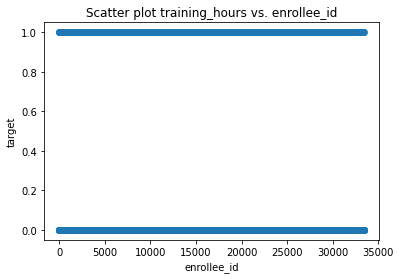

In [14]:
plt.scatter(train['enrollee_id'], train['target'], alpha=0.5)
plt.title('Scatter plot training_hours vs. enrollee_id')
plt.xlabel('enrollee_id')
plt.ylabel('target')
plt.show()

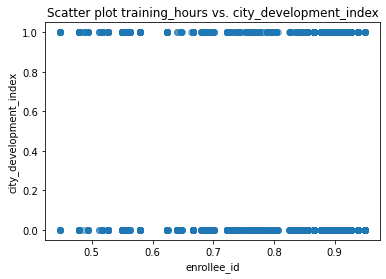

In [15]:
plt.scatter(train['city_development_index'], train['target'], alpha=0.5)
plt.title('Scatter plot training_hours vs. city_development_index')
plt.xlabel('enrollee_id')
plt.ylabel('city_development_index')
plt.show()

Comparing both scatter points  the higher correlating predictor city_development_index is more important to the target (target)

In [16]:
X = train['city_development_index']
y = train['target']
X = sm.add_constant(X)
train.mod1 = sm.OLS(y, X).fit()  ## sm.OLS(output, i.e. dependent variable, input, i.e. independent variable)
train.mod1_summary = train.mod1.summary()
print(train.mod1_summary)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     2532.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:13:54   Log-Likelihood:                -9943.3
No. Observations:               19158   AIC:                         1.989e+04
Df Residuals:                   19156   BIC:                         1.991e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

 it is not acceptable to use this model to predict future values of target because R squared variation is 11%. The p value is 0.000 this however shows they are dependent.

4. Run a basic multiple regression and review the p-values for each variable. If any variables have p-values > 0.05, remove them because they are not statistically significant. Rerun the multiple regression until you can see which of the variables in your dataset should be combined to produce an optimal model. Then build and run your multiple regression model and test its quality. Explain how this model improves the output of the simple linear regression you ran previously.

In [43]:
train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [44]:
# Basic multiple regression 

# change data type and store only the levels array inplace of the object utilizing pandas factorize

train['city'] = pd.factorize(train['city'])[0]
train['gender'] = pd.factorize(train['gender'])[0]
train['relevent_experience'] = pd.factorize(train['relevent_experience'])[0]
train['enrolled_university'] = pd.factorize(train['enrolled_university'])[0]
train['education_level'] = pd.factorize(train['education_level'])[0]
train['major_discipline'] = pd.factorize(train['major_discipline'])[0]
train['experience'] = pd.factorize(train['experience'])[0]
train['company_size'] = pd.factorize(train['company_size'])[0]
train['company_type'] = pd.factorize(train['company_type'])[0]
train['last_new_job'] = pd.factorize(train['last_new_job'])[0]
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,0,0,0,0,0,0,-1,-1,0,36,1.0
1,29725,1,0.776,0,1,0,0,0,1,0,0,1,47,0.0
2,11561,2,0.624,-1,1,1,0,0,2,-1,-1,2,83,0.0
3,33241,3,0.789,-1,1,-1,0,1,3,-1,0,2,52,1.0
4,666,4,0.767,0,0,0,1,0,0,0,1,3,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,0,1,0,0,3,13,-1,-1,0,42,1.0
19154,31398,0,0.920,0,0,0,0,0,13,-1,-1,3,52,1.0
19155,24576,0,0.920,0,0,0,0,0,0,0,0,3,44,0.0
19156,5756,33,0.802,0,0,0,2,-1,3,7,0,5,97,0.0


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  int32  
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  int32  
 4   relevent_experience     19158 non-null  int32  
 5   enrolled_university     19158 non-null  int32  
 6   education_level         19158 non-null  int32  
 7   major_discipline        19158 non-null  int32  
 8   experience              19158 non-null  int32  
 9   company_size            19158 non-null  int32  
 10  company_type            19158 non-null  int32  
 11  last_new_job            19158 non-null  int32  
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int32(10), int64(2)
mem

In [46]:
X = train.iloc[:, :-1].values
y = train.iloc[:, 13].values

X = np.append(arr = np.ones((19158, 1)).astype(int), values = X, axis = 1) # We are building our numpy array

X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]] # Now we combine all 6 input variables into our first iteration
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() # Now we set up our regressor function with OLS again as before.
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     302.2
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:45:20   Log-Likelihood:                -9344.2
No. Observations:               19158   AIC:                         1.872e+04
Df Residuals:                   19144   BIC:                         1.883e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3026      0.023     56.960      0.0

In [47]:
X_opt = X[:, [0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 13]] # variables having p-values > 0.05 have been removed
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() # Now we set up our regressor function with OLS again as before.
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     392.9
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:48:58   Log-Likelihood:                -9344.3
No. Observations:               19158   AIC:                         1.871e+04
Df Residuals:                   19147   BIC:                         1.880e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3033      0.022     59.928      0.0

In [49]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size = 0.2, random_state = 0) 

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Model accuracy score:', round(regressor.score(X_train,y_train)*100,2))

Model accuracy score: 17.21


The model accuracy has been improved from the simple linear regression R Squared from 11% to 17%.

5. Transform your dependent variable from question 1 into a binary shape. Build and run a logistic regression model and explain in AT LEAST two sentences how your output improves on the simple and multiple regression. Is the logistic model better or not as good?

In [50]:
# The Dependant variable is already in a binary shape
# Logistic regression Model.

# Training and Test set
dfTrain = train[:17000]
dfTest = train[17000:19000]
dfCheck = train[19000:]

In [51]:
train_y = np.asarray(dfTrain['target']) # We store target in train_y, but as numpy array
train_x = np.asarray(dfTrain.drop('target',1)) # We remove target from the predictors (because it's the output variable)
test_y = np.asarray(dfTest['target']) # See the comments above
test_x = np.asarray(dfTest.drop('target',1))
train_x 

array([[ 8.9490e+03,  0.0000e+00,  9.2000e-01, ..., -1.0000e+00,
         0.0000e+00,  3.6000e+01],
       [ 2.9725e+04,  1.0000e+00,  7.7600e-01, ...,  0.0000e+00,
         1.0000e+00,  4.7000e+01],
       [ 1.1561e+04,  2.0000e+00,  6.2400e-01, ..., -1.0000e+00,
         2.0000e+00,  8.3000e+01],
       ...,
       [ 2.6174e+04,  3.0000e+01,  8.6600e-01, ...,  0.0000e+00,
         2.0000e+00,  1.7000e+01],
       [ 2.2248e+04,  0.0000e+00,  9.2000e-01, ...,  3.0000e+00,
         4.0000e+00,  1.4000e+01],
       [ 1.5934e+04,  1.5000e+01,  9.1000e-01, ...,  0.0000e+00,
         0.0000e+00,  6.0000e+01]])

In [52]:
means = np.mean(train_x, axis=0)
std = np.std(train_x, axis=0)
 
train_x = (train_x - means)/std
test_x = (test_x - means)/std

In [53]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_x, train_y)

LogisticRegression()

In [54]:
accuracy = model.score(test_x, test_y)
print("accuracy = ", accuracy * 100, "%")

accuracy =  78.10000000000001 %


The model accuracy compared to linear regression is improved drastically from 17% to 78.10000000000001 %. Compared to linear regression Logistic regression is much better.